In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import random
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [6]:
train_R = data.iloc[:,3]  # Features (excluding the first column)

In [7]:
train_R

0      0.446201
1      2.553235
2     -1.116113
3     -1.127136
4     -1.669537
         ...   
328   -0.748227
329   -1.270338
330    0.754189
331   -0.795665
332    0.604769
Name: Radscore, Length: 333, dtype: float64

In [8]:
train_y 

0      1
1      1
2      0
3      0
4      0
      ..
328    0
329    0
330    1
331    0
332    1
Name: status, Length: 333, dtype: int64

In [9]:
train_P = data.iloc[:,2]  

In [10]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [11]:
test_y = data_test.iloc[:, 0] 

In [12]:
test_X = data_test.iloc[:, 1:4] 
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [13]:
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [14]:
test_R = data_test.iloc[:,3]  

In [15]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_params = {
    'n_estimators': 210,
    'random_state':9999,
    'max_depth':3,
    'min_samples_leaf':34,
    'min_samples_split':70,
}

best_RF = RandomForestClassifier(**rf_params)

best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.795774647887324


In [17]:
accuracy = accuracy_score(test_y,  RF_y_pred)
RF_y_score = best_RF.predict_proba(test_X)[:, 1]
fprrf,tprrf,threshold = roc_curve(test_y,RF_y_score)
auc(fprrf,tprrf)

0.8803980099502487

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

RF_train_y_pred = best_RF.predict(train_X)
train_y_prob = best_RF.predict_proba(train_X)[:, 1]

# Calculate AUC
train_auc = roc_auc_score(train_y, train_y_prob)

# Calculate original AUC
fprRF, tprRF, thresholds = roc_curve(train_y, train_y_prob)
original_auc = auc(fprRF, tprRF)

print("Original AUC: {:.3f}".format(original_auc))

Original AUC: 0.916


In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob = best_RF.predict_proba(train_X)[:, 1]

train_auc = roc_auc_score(train_y, train_y_prob)

In [20]:
RF_y_pred =  best_RF.predict(test_X)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
best_model_XGB = xgb.XGBClassifier(n_estimators=254, learning_rate=0.0395, max_depth=3, min_child_weight=7,colsample_bytree=0.4, 
                                   subsample=0.4,random_state=527)



best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)

In [22]:
XGB_train_y_pred = best_model_XGB.predict(train_X)
XGBboost_train_y_score = best_model_XGB.predict_proba(train_X)[:, 1]
fprXGB,tprXGB,threshold = roc_curve(train_y,XGBboost_train_y_score)
auc(fprXGB,tprXGB)

0.9128081340062908

In [23]:
XGB_y_pred = best_model_XGB.predict(test_X)
XGBboost_y_score = best_model_XGB.predict_proba(test_X)[:, 1]
fprxgb,tprxgb,threshold = roc_curve(test_y,XGBboost_y_score)
auc(fprxgb,tprxgb)

0.8877611940298507

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob =best_model_XGB.predict_proba(train_X)[:, 1]

train_auc = roc_auc_score(train_y, train_y_prob)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
    best_GB = GradientBoostingClassifier(learning_rate=0.005,  
                                           n_estimators=278,  
                                           min_samples_split=38,  
                                           min_samples_leaf=27,  
                                           max_depth=3,  
                                           max_features=2,  
                                           subsample=0.7,
                                           random_state=102030)  
      

    best_GB.fit(train_X, train_y)  

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           min_samples_leaf=27, min_samples_split=38,
                           n_estimators=278, random_state=102030,
                           subsample=0.7)

In [27]:
test_gb_pred_proba = best_GB.predict_proba(test_X)[:, 1]
test_auc = roc_auc_score(test_y, test_gb_pred_proba)
GBboost_y_pred=best_GB.predict(test_X)
print("testAUC:", test_auc)
fprgb,tprgb,threshold = roc_curve(test_y,test_gb_pred_proba)
auc(fprgb,tprgb)

testAUC: 0.8906467661691542


0.8906467661691542

In [28]:
fprgb,tprgb,threshold = roc_curve(test_y,test_gb_pred_proba)
auc(fprgb,tprgb)

0.8906467661691542

In [29]:
GBboost_train_y_pred=best_GB.predict(train_X)
train_GB_pred_proba = best_GB.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_GB_pred_proba)
print("Train AUC:", train_auc )

Train AUC: 0.9233230926779313


In [30]:
fprGB,tprGB,threshold = roc_curve(train_y,train_GB_pred_proba)
auc(fprGB,tprGB)

0.9233230926779313

In [31]:
best_GB_y_score =best_GB.predict_proba(test_X)[:, 1]

In [51]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


best_params_LGBM = {
    'lambda_l1': 0.7,
    'lambda_l2': 1e-05,
    'learning_rate': 0.005,
    'n_estimators': 600,
    'max_depth': 4,
    'num_leaves': 12,
    'max_bin': 14,
    'min_data_in_leaf': 32,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.6,
    'bagging_freq': 10,
    'random_state': 123,
    'verbose': -1
}


best_LGBM = lgb.LGBMClassifier(**best_params_LGBM)
best_LGBM.fit(train_X, train_y)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=123, verbose=-1)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
train_y_pred = best_LGBM.predict(train_X)
train_accuracy = accuracy_score(train_y, train_y_pred)
print("Training Accuracy:", train_accuracy)
train_y_prob = best_LGBM.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

Training Accuracy: 0.8378378378378378
Training AUC： 0.9172701338599956


In [54]:
y_score_LGBM = best_LGBM.predict_proba(test_X)[:, 1]
LGBM_y_pred=best_LGBM.predict(test_X)
test_accuracy = accuracy_score(test_y, LGBM_y_pred)
print("Test_accuracy:", test_accuracy)
fprlgbm, tprlgbm, threshold = roc_curve(test_y, y_score_LGBM)
test_auc = roc_auc_score(test_y, y_score_LGBM )
print("Test AUC:", test_auc)

Test_accuracy: 0.823943661971831
Test AUC: 0.8920398009950249


In [55]:
fprLGBM, tprLGBM, thresholds= roc_curve(train_y, train_y_prob)
fprlgbm, tprlgbm, thresholds = roc_curve(test_y, y_score_LGBM)

In [56]:
clf_1_list = [
    (best_RF, "RF"),
    (best_model_XGB, "XGB"),
    (best_GB, "GBM"),
    (best_LGBM, "LGBM"),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


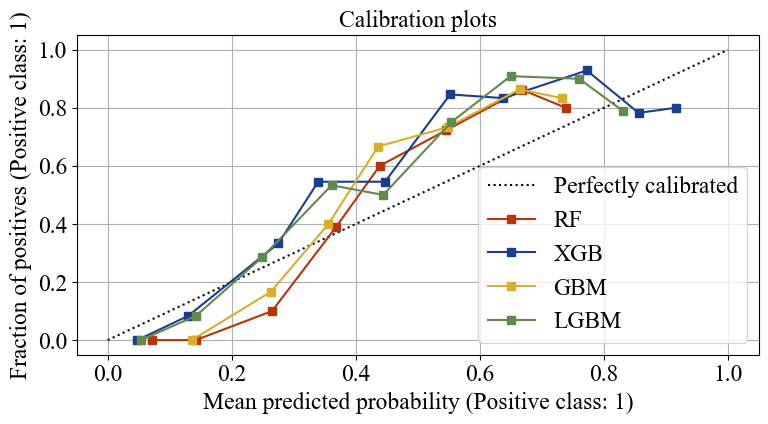

In [57]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

np.random.seed(321)
random.seed(321)

# Create canvas and subplots
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 2)

# Create subplot for calibration curve
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots", fontsize=17, fontname='Times New Roman')
ax_calibration_curve.set_xlabel('Mean predicted probability', fontsize=17, fontname='Times New Roman')
ax_calibration_curve.set_ylabel("Fraction of positives", fontsize=17, fontname='Times New Roman')
ax_calibration_curve.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 13}, facecolor='white')

combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Define color list
colors = ["#B73508", "#193E8F", "#D9AE2C", "#64894D"]

# Plot calibration curves for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train model
    color = colors[i % len(colors)]  # Cycle through colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Use classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()

plt.show()  # Display plot

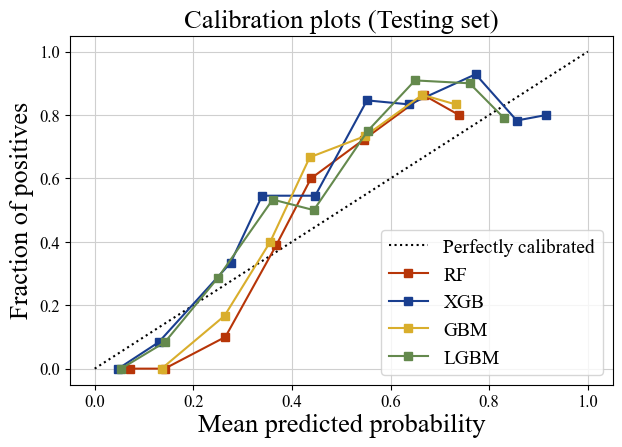

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import calibration_curve

# Set random seed for reproducibility
np.random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(7, 7))
gs = GridSpec(3, 2)

# Create subplot for calibration curve
ax1 = fig.add_subplot(gs[:2, :2])

# Define color list
colors = ["#B73508", "#193E8F", "#D9AE2C", "#64894D"]

# Plot perfectly calibrated line
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# List of classifiers and their names
classifiers = [(best_RF, "RF"), (best_model_XGB, "XGB"), (best_GB, "GBM"), (best_LGBM, "LGBM")]

# Train classifiers and plot calibration curves
for i, (clf, name) in enumerate(classifiers):
    clf.fit(train_X, train_y)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(test_X)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(test_X)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(test_y, prob_pos, n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name,), color=colors[i])

# Customize plot appearance
plt.grid(True, color='#CFCFCF')
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
ax1.set_ylabel("Fraction of positives", fontsize=19, fontname='Times New Roman')
ax1.set_xlabel("Mean predicted probability", fontsize=19, fontname='Times New Roman', labelpad=2)
ax1.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 14}, facecolor='white')
ax1.set_title('Calibration plots (Testing set)', fontsize=19, fontname='Times New Roman')

# Show the plot
#plt.savefig("CalibrationPlots1 test.pdf")  # Save as PDF
plt.show()

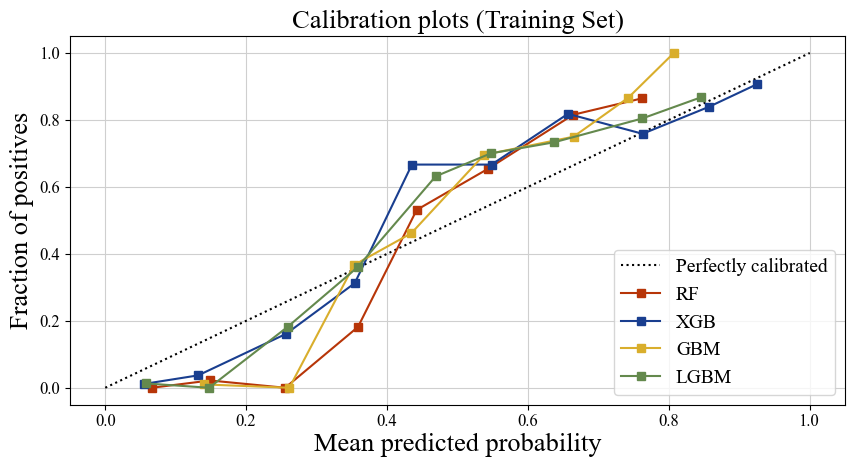

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import calibration_curve

# Set random seed for reproducibility
np.random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
# Create subplot for calibration curve
ax1 = fig.add_subplot(gs[:2, :2])

# Define color list
colors = ["#B73508", "#193E8F", "#D9AE2C", "#64894D"]

# Plot perfectly calibrated line
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# List of classifiers and their names
classifiers = [(best_RF, "RF"), (best_model_XGB, "XGB"), (best_GB, "GBM"), (best_LGBM, "LGBM")]

# Train classifiers and plot calibration curves for training set
for i, (clf, name) in enumerate(classifiers):
    clf.fit(train_X, train_y)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(train_X)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(train_X)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(train_y, prob_pos, n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name,), color=colors[i])

# Customize plot appearance
plt.grid(True, color='#CFCFCF')
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
ax1.set_ylabel("Fraction of positives", fontsize=19, fontname='Times New Roman')
ax1.set_xlabel("Mean predicted probability", fontsize=19, fontname='Times New Roman', labelpad=2)
ax1.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 14}, facecolor='white')
ax1.set_title('Calibration plots (Training Set)', fontsize=19, fontname='Times New Roman')

# Show the plot
plt.show()


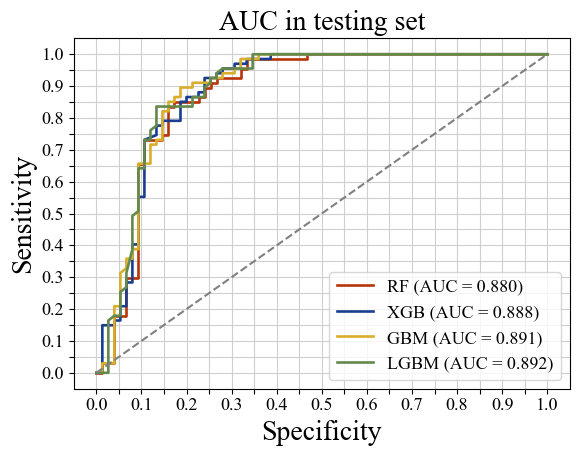

In [60]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Update font settings for plots
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.size': 17})

colors = ["#B73508", "#193E8F", "#D9AE2C", "#64894D"]

# Dictionary with FPR and TPR for each model
models = {
    'RF': (fprrf, tprrf),
    'XGB': (fprxgb, tprxgb),
    'GBM': (fprgb, tprgb),
    'LGBM': (fprlgbm, tprlgbm),
}

# Plot ROC curves
for i, (model, (model_fpr, model_tpr)) in enumerate(models.items()):
    model_auc = auc(model_fpr, model_tpr)
    plt.plot(model_fpr, model_tpr, label=f'{model} (AUC = {model_auc:.3f})', color=colors[i], linewidth=1.9)

# Add legend in the lower right corner, displaying AUC values
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 13}, facecolor='white')
plt.title('AUC in testing set', fontname='Times New Roman', fontsize=20)
plt.xlabel("Specificity", fontname='Times New Roman', fontsize=20)
plt.ylabel("Sensitivity", fontname='Times New Roman', fontsize=20)

# Set x-axis ticks and labels, with empty strings for odd ticks
plt.xticks([i/20.0 for i in range(21)], labels=[f"{i/20.0:.1f}" if i % 2 == 0 else "" for i in range(21)], fontname='Times New Roman', fontsize=13)

# Set y-axis ticks and labels, with empty strings for odd ticks
plt.yticks([i/20.0 for i in range(21)], labels=[f"{i/20.0:.1f}" if i % 2 == 0 else "" for i in range(21)], fontname='Times New Roman', fontsize=13)

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.500)')

# Adjust bottom margin to 15%
plt.subplots_adjust(bottom=0.15)

# Enable grid with light gray color
plt.grid(True, color='#CFCFCF')

# Display the plot
# plt.savefig('roc_curves_test.pdf', format='pdf')
plt.show()

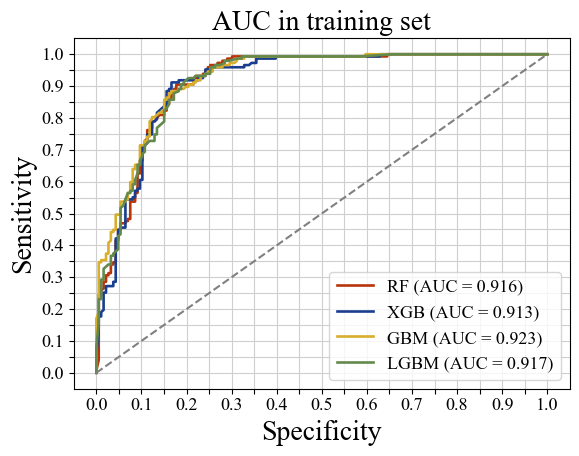

In [61]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Specify color order
colors = ["#B73508", "#193E8F", "#D9AE2C", "#64894D"]

# Dictionary with FPR and TPR for each model
models = {
    'RF': (fprRF, tprRF),
    'XGB': (fprXGB, tprXGB),
    'GBM': (fprGB, tprGB),
    'LGBM': (fprLGBM, tprLGBM),
}

# Plot ROC curves
for i, (model, (model_fpr, model_tpr)) in enumerate(models.items()):
    model_auc = auc(model_fpr, model_tpr)
    plt.plot(model_fpr, model_tpr, label=f'{model} (AUC = {model_auc:.3f})', color=colors[i], linewidth=1.9)

# Add legend in the lower right corner, displaying AUC values
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 13}, facecolor='white')
plt.title('AUC in training set', fontname='Times New Roman', fontsize=20)
plt.xlabel("Specificity", fontname='Times New Roman', fontsize=20)
plt.ylabel("Sensitivity", fontname='Times New Roman', fontsize=20)

# Set x-axis ticks and labels, with empty strings for odd ticks
plt.xticks([i/20.0 for i in range(21)], labels=[f"{i/20.0:.1f}" if i % 2 == 0 else "" for i in range(21)], fontname='Times New Roman', fontsize=13)

# Set y-axis ticks and labels, with empty strings for odd ticks
plt.yticks([i/20.0 for i in range(21)], labels=[f"{i/20.0:.1f}" if i % 2 == 0 else "" for i in range(21)], fontname='Times New Roman', fontsize=13)

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.500)')

# Adjust bottom margin to 15%
plt.subplots_adjust(bottom=0.15)

# Enable grid with light gray color
plt.grid(True, color='#CFCFCF')

# Display the plot
# plt.savefig('roc_curves_train.pdf', format='pdf')
plt.show()


Model: RF, Trained model: RandomForestClassifier(max_depth=3, min_samples_leaf=34, min_samples_split=70,
                       n_estimators=210, random_state=9999)
Model: XGB, Trained model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)
Model: GBM, Trained model: GradientBoostingClassifier(learning

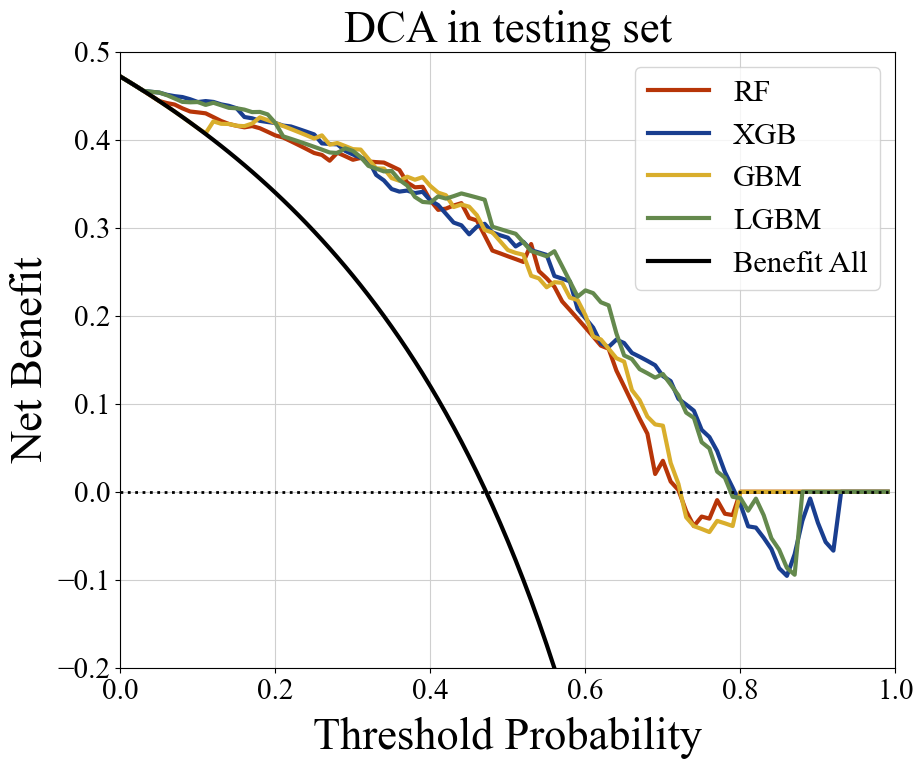

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
models = [
    ("RF", best_RF),
    ("XGB",best_model_XGB),
    ("GBM", best_GB),
    ("LGBM",best_LGBM),
] 


def net_benefit_model(test_y,y_prob,thresh_group):
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        n=len(test_y)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model


def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,test_y).ravel()
    total = tp + tn
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
color = [ "#B73508","#193E8F","#D9AE2C", "#64894D"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name,lw=3)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All',lw=3)
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 32}, labelpad=9)
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 32})
plt.title('DCA in testing set', fontdict={'family': 'Times New Roman', 'fontsize': 32, 'stretch': 'expanded'})
plt.grid('major')
plt.xticks(fontname='Times New Roman', fontsize=21) 
plt.yticks(fontname='Times New Roman', fontsize=21)  
plt.grid(True, color='#CFCFCF')
plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 22})

#plt.savefig('C:/Users/12292/Desktop/DCA test.pdf', format='pdf')
plt.show()

Model: RF, Trained model: RandomForestClassifier(max_depth=3, min_samples_leaf=34, min_samples_split=70,
                       n_estimators=210, random_state=9999)
Model: XGB, Trained model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)
Model: GBM, Trained model: GradientBoostingClassifier(learning

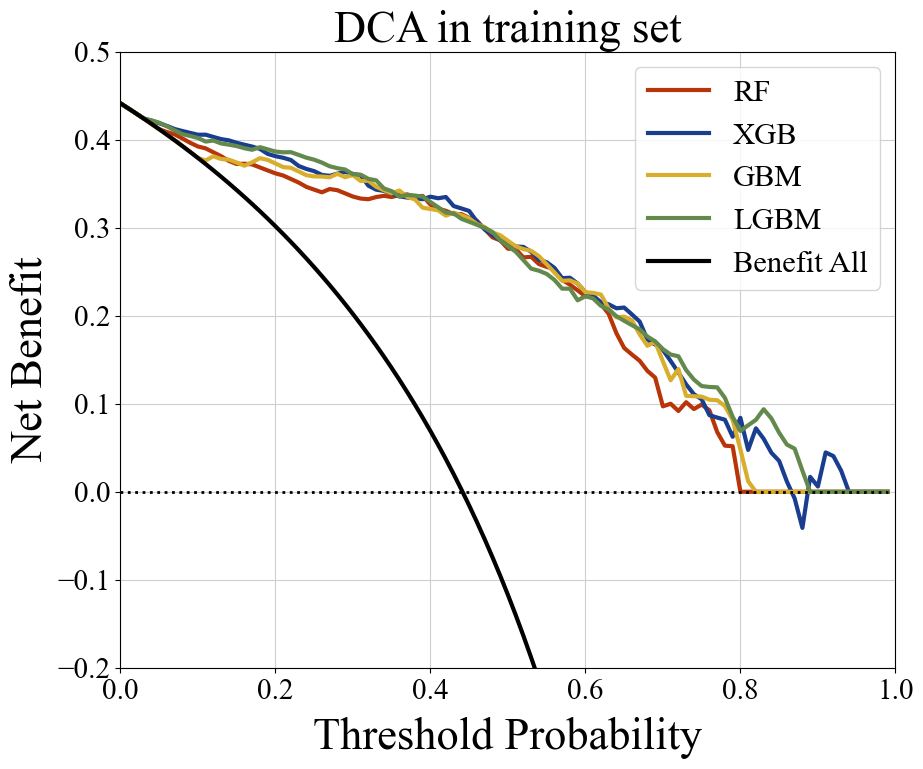

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
models = [
    ("RF", best_RF),
    ("XGB",best_model_XGB),
    ("GBM", best_GB),
    ("LGBM",best_LGBM),
] 

def net_benefit_model(test_y,y_prob,thresh_group):
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        n=len(test_y)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model

def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,test_y).ravel()
    total = tp + tn
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
color = [ "#B73508","#193E8F","#D9AE2C", "#64894D"]
a = 0
benefit_all = net_benefit_all(train_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(train_X)[:, 1]
    benefit_model = net_benefit_model(train_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name,lw=3)
    a += 1
    benefit_models.append(benefit_model)

plt.plot(thresh_group, benefit_all, color='black', label='Benefit All',lw=3)
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 32}, labelpad=9)
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 32})
plt.title('DCA in training set', fontdict={'family': 'Times New Roman', 'fontsize': 32, 'stretch': 'expanded'})
plt.grid('major')
plt.xticks(fontname='Times New Roman', fontsize=21) 
plt.yticks(fontname='Times New Roman', fontsize=21)  
plt.grid(True, color='#CFCFCF')
plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 22})

#plt.savefig('C:/Users/12292/Desktop/DCA train.pdf', format='pdf')
plt.show()


In [64]:
#that's all Thank you